In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import json
import seaborn as sns
import gc

## Importing datasets

In [2]:
product_dtypes = {'product':'uint16','product_category':'object','product_subcategory': 'object',
                  'var_1': 'float16','var_2': 'float16','var_3': 'float16','var_4':'float16',
                  'var_5': 'float16','var_6': 'float16','var_7': 'float16','var_8':'float16',
                  'var_9':'float16','var_10':'float16'}

In [3]:
city_dict={}
f = open('city_dict.json')
city = json.load(f)
for key in city.keys():
    city_dict[int(key)]=city[key]
f.close()
del(city)
#city_dict

In [4]:
products = pd.read_csv('product_information.csv',dtype=product_dtypes)
foot_fall = pd.read_csv('foot_fall.csv')
h_disc = pd.read_csv('historical_discount.csv')
e_disc = pd.read_csv('expected_discount.csv')

In [5]:
sales_15 = pd.read_csv('2015_sales_data.csv')
sales_16 = pd.read_csv('2016_sales_data.csv')
sales_17 = pd.read_csv('2017_sales_data.csv')
sales_18 = pd.read_csv('2018_sales_data.csv')

df=[sales_15,sales_16, sales_17, sales_18]
sales = pd.concat(df, keys = ['2015','2016','2017','2018'])

del(sales_15,sales_16,sales_17,sales_18)

## Resetting dtypes and reducing memory usage

In [6]:
sales.date=pd.to_datetime(sales.date)
sales['city']=sales['city'].astype(np.uint8)
sales['product']=sales['product'].astype(np.uint16)
sales['sales']=sales['sales'].astype(np.int64)

In [7]:
foot_fall.set_index('city', inplace=True)
foot_fall=foot_fall.T.reset_index()
foot_fall.rename(columns={'index':'date'},inplace=True)
foot_fall.date = pd.to_datetime(foot_fall.date)

cities=['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Jaipur', 'Kolkata', 'Lucknow', 'Mumbai', 'Other']

foot_fall[cities]=foot_fall[cities].fillna(0).astype(np.uint16)

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              3389 non-null   uint16 
 1   product_category     3389 non-null   object 
 2   product_subcategory  3389 non-null   object 
 3   var_1                3389 non-null   float16
 4   var_2                3389 non-null   float16
 5   var_3                3389 non-null   float16
 6   var_4                3389 non-null   float16
 7   var_5                3389 non-null   float16
 8   var_6                3389 non-null   float16
 9   var_7                3389 non-null   float16
 10  var_8                3389 non-null   float16
 11  var_9                3389 non-null   float16
 12  var_10               3389 non-null   float16
dtypes: float16(10), object(2), uint16(1)
memory usage: 125.9+ KB


In [9]:
products = products.replace({'^Cat_':'','SubCat_':''}, regex =True)
products[['product_category', 'product_subcategory']] = products[['product_category', 
                                                                  'product_subcategory']].apply(pd.to_numeric)
products[['product_category', 'product_subcategory']]=products[['product_category', 'product_subcategory']].astype(np.uint16)

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product              3389 non-null   uint16 
 1   product_category     3389 non-null   uint16 
 2   product_subcategory  3389 non-null   uint16 
 3   var_1                3389 non-null   float16
 4   var_2                3389 non-null   float16
 5   var_3                3389 non-null   float16
 6   var_4                3389 non-null   float16
 7   var_5                3389 non-null   float16
 8   var_6                3389 non-null   float16
 9   var_7                3389 non-null   float16
 10  var_8                3389 non-null   float16
 11  var_9                3389 non-null   float16
 12  var_10               3389 non-null   float16
dtypes: float16(10), uint16(3)
memory usage: 86.2 KB


In [11]:
h_disc.rename(columns={'Discount_Ahmedabad':'Ahmedabad', 'Discount_Bangalore':'Bangalore',
                       'Discount_Chennai':'Chennai', 'Discount_Delhi':'Delhi', 'Discount_Hyderabad':'Hyderabad',
                       'Discount_Jaipur':'Jaipur', 'Discount_Kolkata':'Kolkata', 'Discount_Lucknow':'Lucknow',
                       'Discount_Mumbai':'Mumbai', 'Discount_Other':'Other'}, inplace=True)

h_disc[cities]=h_disc[cities].astype(np.uint8)
h_disc['product']=h_disc['product'].astype(np.uint16)
h_disc.date=pd.to_datetime(h_disc.date)

h_disc=(h_disc.melt(['date','product'], 
             var_name='city', 
             value_name='discount'))

#h_disc.info()

In [12]:
e_disc.rename(columns={'Discount_Ahmedabad':'Ahmedabad', 'Discount_Bangalore':'Bangalore',
                       'Discount_Chennai':'Chennai', 'Discount_Delhi':'Delhi', 'Discount_Hyderabad':'Hyderabad',
                       'Discount_Jaipur':'Jaipur', 'Discount_Kolkata':'Kolkata', 'Discount_Lucknow':'Lucknow',
                       'Discount_Mumbai':'Mumbai', 'Discount_Other':'Other'}, inplace=True)

e_disc[cities]=e_disc[cities].astype(np.uint8)
e_disc['product']=e_disc['product'].astype(np.uint16)
e_disc.date=pd.to_datetime(e_disc.date)

e_disc=(e_disc.melt(['date','product'], 
             var_name='city', 
             value_name='discount'))
#e_disc.info()

In [13]:
gc.collect()

40

## Exploring data

In [14]:
print(city_dict)
print('foot fall',foot_fall.shape)
print('products',products.shape)
print('Historical discounts',h_disc.shape)
print('expected discount',e_disc.shape)

{4: 'Mumbai', 5: 'Delhi', 7: 'Bangalore', 1: 'Kolkata', 6: 'Chennai', 8: 'Hyderabad', 9: 'Ahmedabad', 3: 'Jaipur', 10: 'Lucknow', 2: 'Other'}
foot fall (1206, 11)
products (3389, 13)
Historical discounts (1127530, 4)
expected discount (309870, 4)


In [15]:
#Replacing city ids with names
def cv(x):
    return (city_dict[x])
sales.city = sales.city.apply(cv)

#Deleting duplicate entries
print('old shape',sales.shape)
sales.drop_duplicates(['date','product','city'], inplace=True)
sales.reset_index(drop=True,inplace=True)
print('new shape',sales.shape)

old shape (21135745, 4)
new shape (21113141, 4)


### Exploring Foot Fall

In [16]:
ff = foot_fall.set_index('date').copy()
print(ff.head())

city        Ahmedabad  Bangalore  Chennai  Delhi  Hyderabad  Jaipur  Kolkata  \
date                                                                           
2015-01-02       9384      16644    19544  16832      13588   13000    13948   
2015-01-03       6808      14640    13752  13256      11548   11616    12104   
2015-01-04       8064      15660    13736  14520      11600   11848    12752   
2015-01-05      10248      19056    19740  17324      16336   12240    14492   
2015-01-06      11180      19740    21604  17672      18364   10992    14360   

city        Lucknow  Mumbai  Other  
date                                
2015-01-02    12308   19284   8572  
2015-01-03     9228   14472   7180  
2015-01-04    10792   16676   6716  
2015-01-05    13836   19684   8616  
2015-01-06    13188   19700   9252  


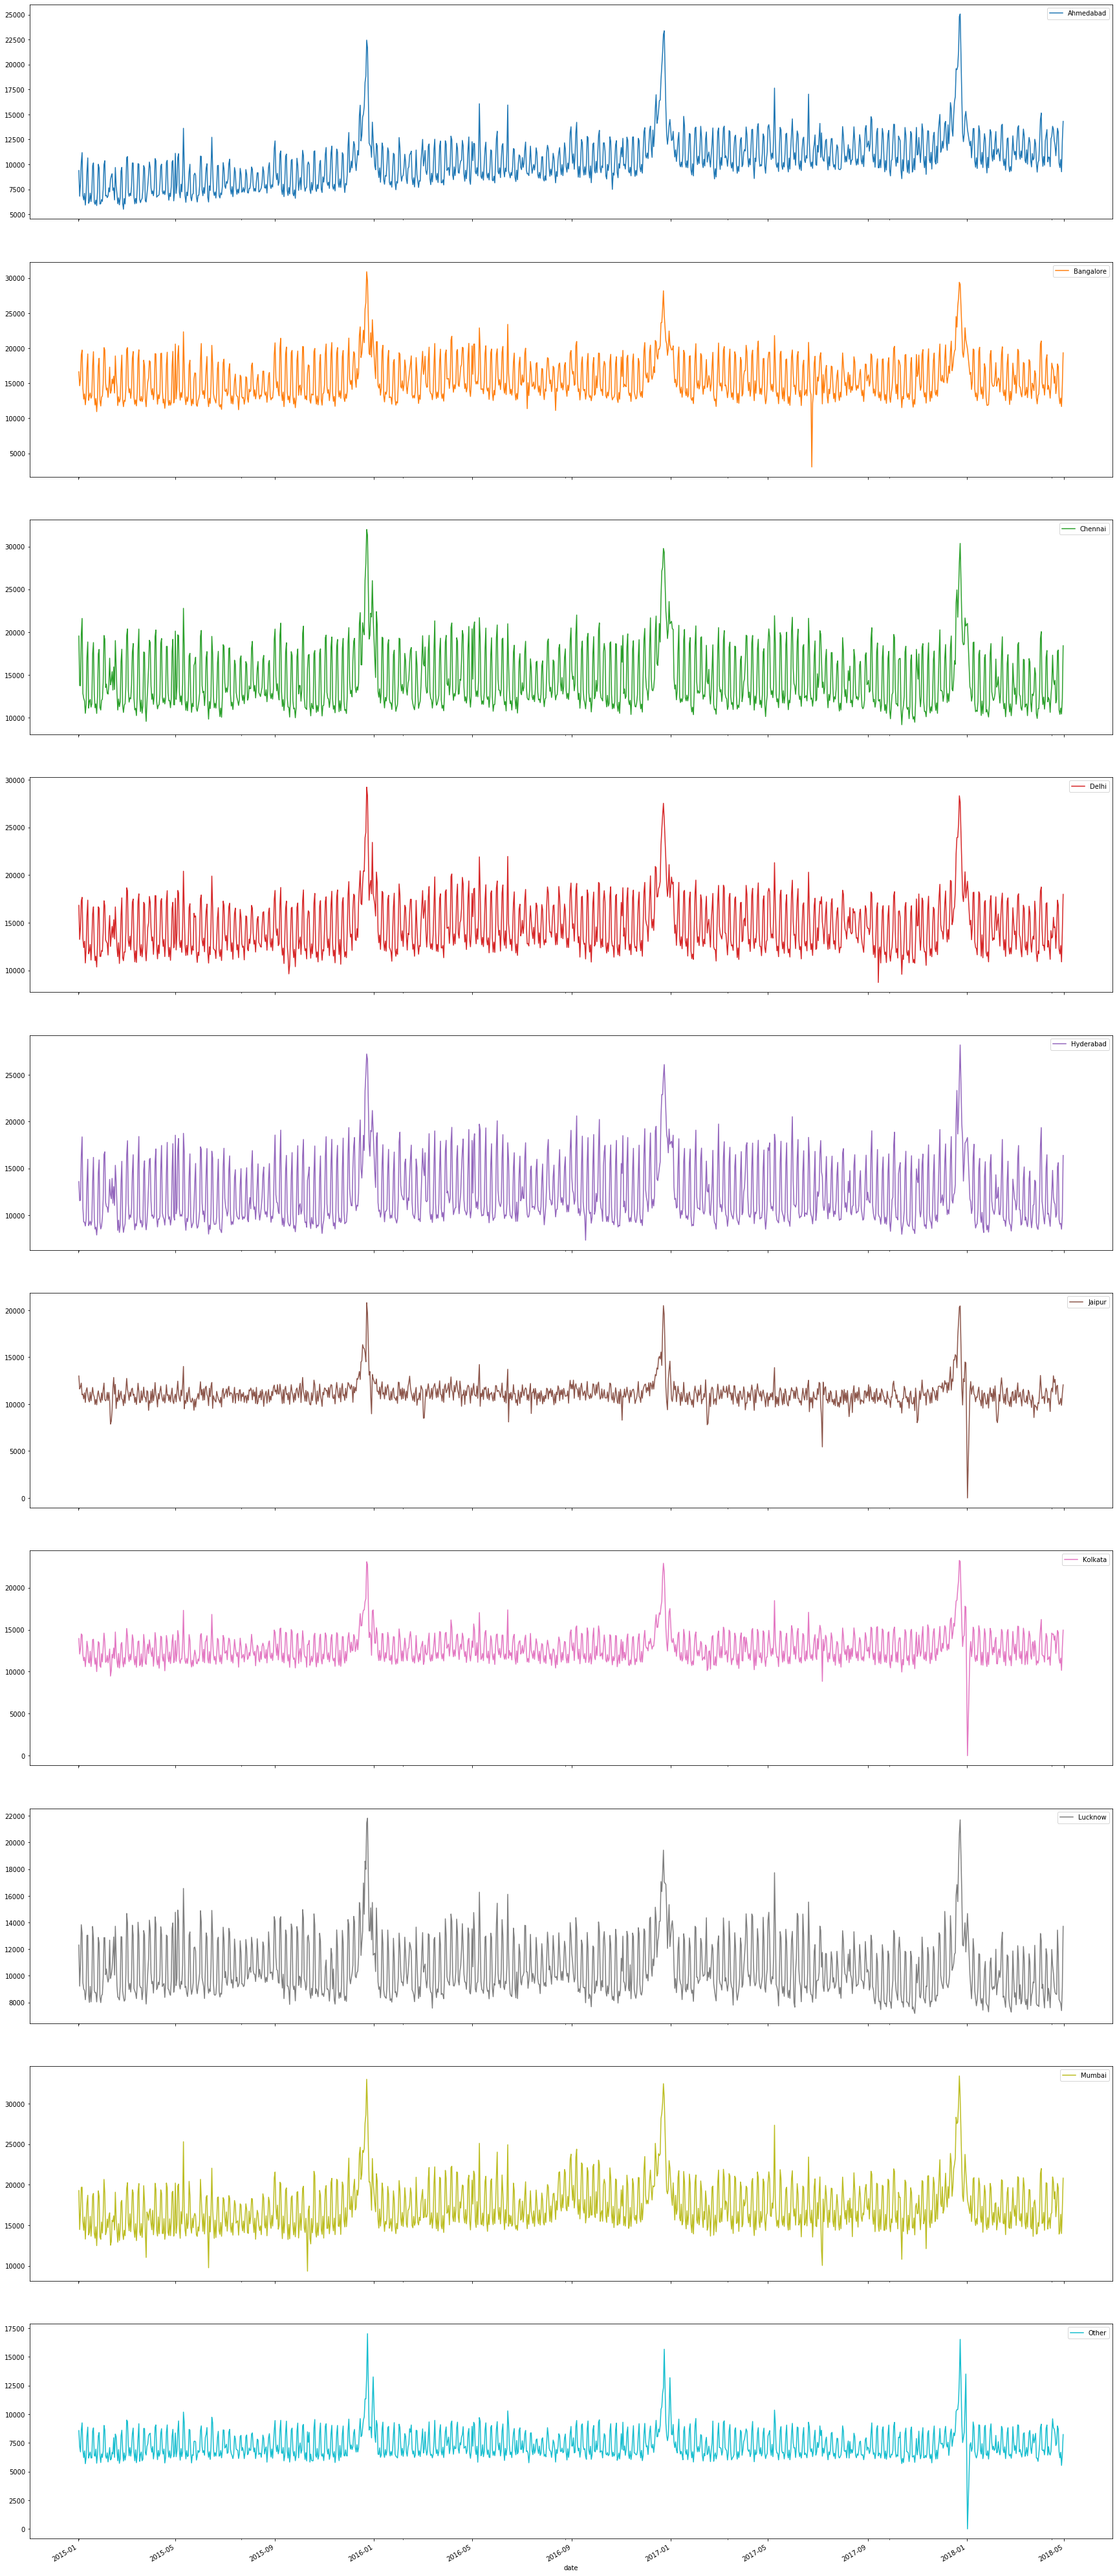

In [17]:
#Seasonal increase in customer visits can be observed
ff.plot(kind='line', subplots=True, figsize=(30,80))
del(ff)

In [18]:
del foot_fall

## Exploring Sales

### **1. Data on cities (normalized)**

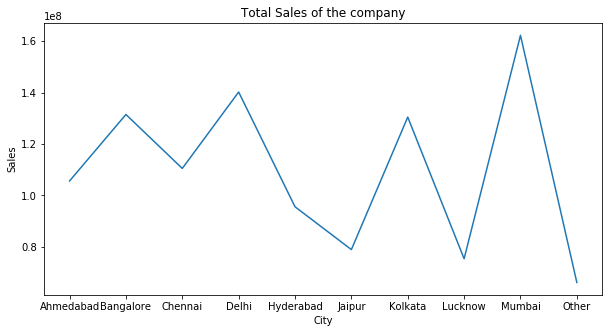

In [19]:
S = sales.groupby(['city'])['sales'].sum()
S.astype('float')
plt.figure(figsize=(10,5))
plt.title('Total Sales of the company')
plt.xlabel('City')
plt.ylabel('Sales')
plt.plot(S);
del S

Text(0.5, 1.0, 'Cities (Normalized)')

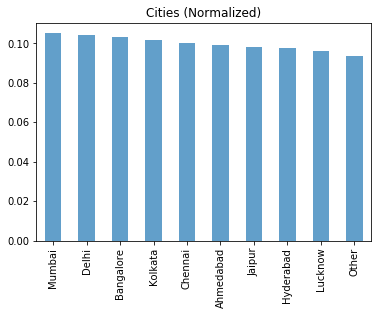

In [20]:
sales['city'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Cities (Normalized)')

### 2. Data on products (Normalized)

Text(0.5, 1.0, 'Products(Normalized)')

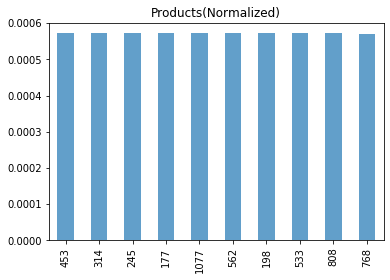

In [21]:
sales['product'].value_counts(normalize=True)[:10,].plot(kind='bar', alpha=0.7)
plt.title('Products(Normalized)')

Text(0.5, 1.0, 'Products(Normalized)')

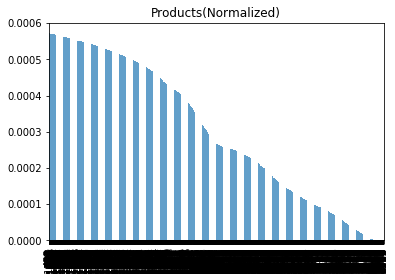

In [22]:
sales['product'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Products(Normalized)')

### 3. Exploring [City, Product] combinations

In [23]:
key_indices = ['city','product']
city_sales = sales.groupby(key_indices)['date','sales'].agg({"date":["min",'max'],"sales":"sum"})

print(city_sales.head())

del(city_sales)

C:\Users\SAYALI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


                        date              sales
                         min        max     sum
city      product                              
Ahmedabad 1       2015-01-02 2018-04-30   21708
          2       2015-01-02 2018-04-30  105392
          3       2015-01-02 2018-04-30  120164
          4       2015-01-02 2018-04-30   11452
          5       2015-01-02 2018-04-26    4312


In [24]:
pvt = pd.pivot_table(sales, columns = 'city', index = ['product'], aggfunc='sum', values='sales')
print(pvt)

del(pvt)

city     Ahmedabad  Bangalore   Chennai     Delhi  Hyderabad   Jaipur  \
product                                                                 
1          21708.0    28576.0   30488.0   26304.0    24124.0  11008.0   
2         105392.0    90588.0   94388.0  149264.0    88388.0  46740.0   
3         120164.0   246764.0  220360.0  264228.0   211460.0  71148.0   
4          11452.0    31532.0   34208.0   39900.0    45656.0  14444.0   
5           4312.0    17608.0   13212.0   11720.0    11416.0   4364.0   
...            ...        ...       ...       ...        ...      ...   
3320           NaN      660.0       NaN       NaN        NaN      NaN   
3321           8.0       28.0      52.0      84.0       12.0      8.0   
3322           NaN        NaN      36.0       NaN       80.0     12.0   
3323           NaN       12.0       NaN       NaN       16.0      8.0   
3324           NaN        NaN       NaN       NaN        NaN      NaN   

city      Kolkata   Lucknow    Mumbai    Other  
p

In [25]:
#Exploring for Kolkata city,with  various products sold
kolkata = pd.pivot_table(sales[sales.city=='Kolkata'], columns = 'product', index = ['date'], aggfunc='sum', values='sales')
kolkata.columns

UInt64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             3306, 3308, 3311, 3312, 3313, 3315, 3317, 3318, 3321, 3322],
            dtype='uint64', name='product', length=3198)

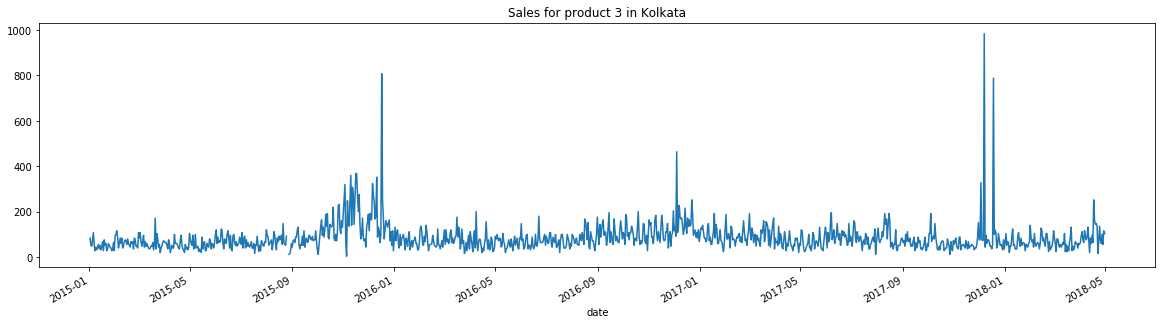

In [26]:
# Every product has different trends depending on categories
kolkata[3].plot(kind='line',figsize=(20,5), title = 'Sales for product 3 in Kolkata')

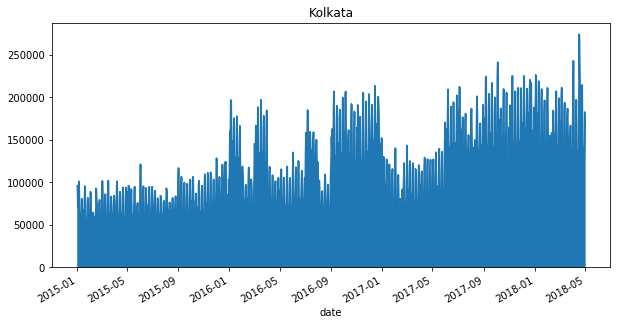

In [27]:
# Total sales in Kolkata
sales_kolkata = kolkata.sum(axis=1)
sales_kolkata.plot.area(figsize = (10,5), title = 'Kolkata')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000255AB3F7F88>,
      dtype=object)

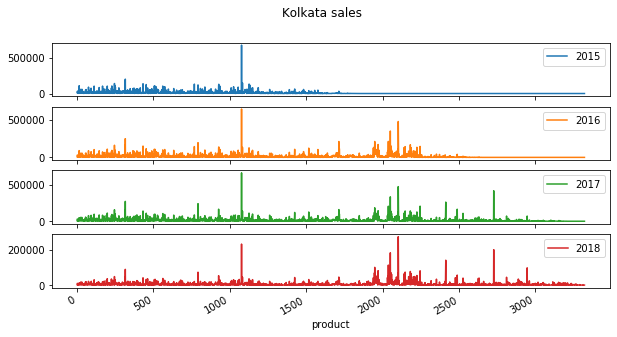

In [28]:
m = kolkata.groupby([kolkata.index.year]).sum()
m.T.plot(kind='line',subplots=True,figsize = (10,5), title = 'Kolkata sales')

In [29]:
del(kolkata,sales_kolkata,m)

In [30]:
gc.collect()

97

### 4. **Finding outliers**

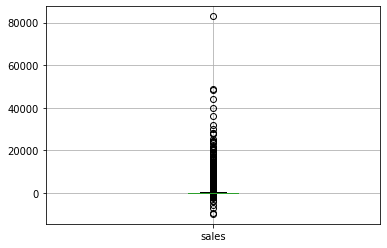

In [31]:
sales[['sales']].boxplot()

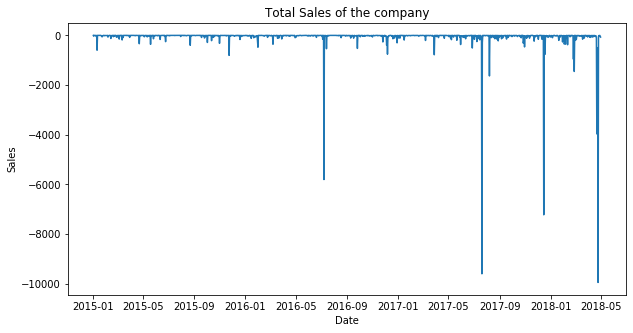

In [32]:
f = sales.groupby(['date'])['sales'].min()
f.astype(np.uint16)
plt.figure(figsize=(10,5))
plt.title('Total Sales of the company')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(f);

del f

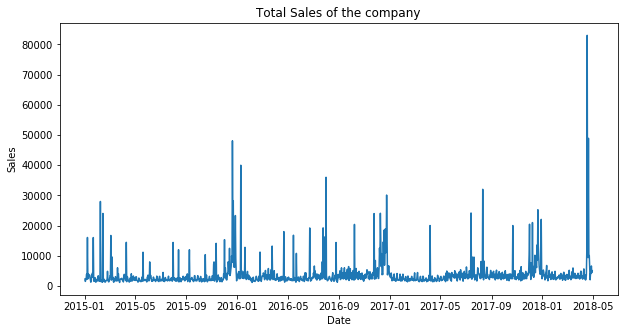

In [33]:
f = sales.groupby(['date'])['sales'].max()
f.astype(np.uint16)
plt.figure(figsize=(10,5))
plt.title('Total Sales of the company')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(f);

del f

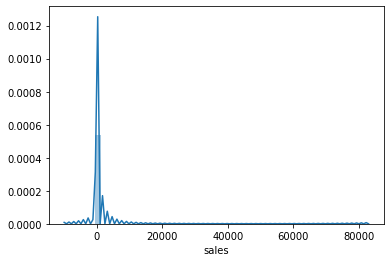

In [34]:
sns.distplot(sales['sales']);

In [35]:
sales['sales'].sort_values(ascending=True)[:10]

20958299   -9948
14457066   -9600
17827808   -7224
7550006    -5804
20876134   -3968
20876025   -3956
20876135   -3940
20874767   -2664
20956849   -1988
20882414   -1976
Name: sales, dtype: int64

In [36]:
sales['sales'].sort_values(ascending=False)[:10]

20807090    82992
20879814    48912
4476514     48084
20806547    44128
4763522     40000
8025960     36012
14923041    32036
10749665    30127
4501444     28202
436481      28004
Name: sales, dtype: int64

In [37]:
sales[sales['sales'] > 30000]

,date,city,product,sales
4476514,2015-12-21,Ahmedabad,861,48084
4763522,2016-01-10,Delhi,1299,40000
8025960,2016-08-01,Delhi,1239,36012
10749665,2016-12-24,Chennai,1342,30127
14923041,2017-08-11,Mumbai,2236,32036
20806547,2018-04-18,Delhi,2,44128
20807090,2018-04-18,Delhi,518,82992
20879814,2018-04-21,Delhi,198,48912


In [38]:
print(sales[sales['product']==1299]['sales'].sort_values(ascending=False)[:10])
sales[sales['product']==1299]['sales'].median()

4763522     40000
10145384    24000
17670320    21028
17499388    20464
10600627     8028
18049206     6696
4439423      6528
10487138     6496
4446722      6360
10385709     6164
Name: sales, dtype: int64


224.0

In [39]:
sales[sales['product']==203]['sales'].sort_values(ascending=True)[:10]

5140560    -476
4841425     -24
740200       -4
2842024       4
2849500       4
2854380       4
15126872      4
15128980      4
16371077      4
6741986       4
Name: sales, dtype: int64

In [40]:
sales=sales[(sales['sales']>-2000)]
sales = sales[sales['sales']<5000]
sales.reset_index(drop=True,inplace=True)
sales.shape

(21112679, 4)

## Working with features, merging datasets

In [41]:
result = pd.merge(sales, h_disc, how='left', on=['date', 'product','city'] ).fillna(0)

In [42]:
del(sales, h_disc)

gc.collect()

11090

In [43]:
#Converting categorical cities to city ids
new_dict = dict([(value, key) for key, value in city_dict.items()]) 
result.replace(new_dict, inplace=True)

In [44]:
features = pd.merge(result, products,how='left', on=['product']).fillna(0)

In [45]:
del(result,products)

gc.collect()

40

In [46]:
#features.info()
features['day'] = features['date'].map(lambda x: x.day)
features['month'] = features['date'].map(lambda x: x.month)
features['year'] = features['date'].map(lambda x: x.year)
features.drop('date', axis=1, inplace=True)


In [47]:
features.reset_index(drop=True,inplace=True)

In [48]:
gc.collect()

40

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21112679 entries, 0 to 21112678
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   city                 int64  
 1   product              uint16 
 2   sales                int64  
 3   discount             float64
 4   product_category     uint16 
 5   product_subcategory  uint16 
 6   var_1                float16
 7   var_2                float16
 8   var_3                float16
 9   var_4                float16
 10  var_5                float16
 11  var_6                float16
 12  var_7                float16
 13  var_8                float16
 14  var_9                float16
 15  var_10               float16
 16  day                  int64  
 17  month                int64  
 18  year                 int64  
dtypes: float16(10), float64(1), int64(5), uint16(3)
memory usage: 1.5 GB


In [50]:
features.columns

Index(['city', 'product', 'sales', 'discount', 'product_category',
       'product_subcategory', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'day', 'month', 'year'],
      dtype='object')

In [51]:
dtypes = {'city':'uint8','discount':'uint8', 'product_category':'uint16',
       'product_subcategory':'uint16', 'day':'uint8', 'month':'uint8', 'year':'uint16'}
c = ['city', 'discount', 'product_category','product_subcategory', 'day', 'month', 'year']
features[c]=features[c].astype(dtypes)

In [52]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21112679 entries, 0 to 21112678
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   city                 uint8  
 1   product              uint16 
 2   sales                int64  
 3   discount             uint8  
 4   product_category     uint16 
 5   product_subcategory  uint16 
 6   var_1                float16
 7   var_2                float16
 8   var_3                float16
 9   var_4                float16
 10  var_5                float16
 11  var_6                float16
 12  var_7                float16
 13  var_8                float16
 14  var_9                float16
 15  var_10               float16
 16  day                  uint8  
 17  month                uint8  
 18  year                 uint16 
dtypes: float16(10), int64(1), uint16(4), uint8(4)
memory usage: 805.4 MB


## Exploring features

Text(0.5, 1.0, 'Cities in training data (Normalized)')

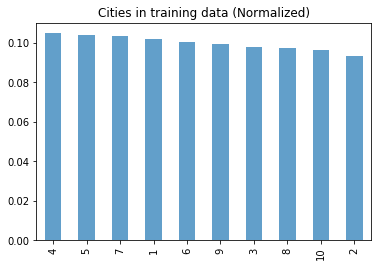

In [53]:
features['city'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('Cities in training data (Normalized)')

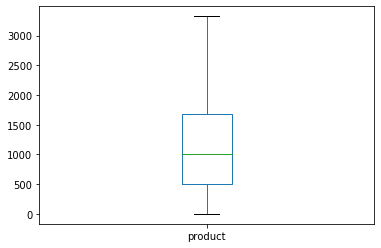

In [54]:
features['product'].plot(kind='box')

Text(0.5, 1.0, 'Products in training data')

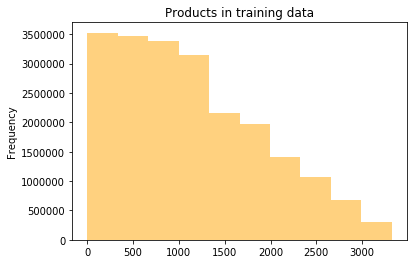

In [55]:
features['product'].plot(kind='hist', color='orange', alpha=0.5)
plt.title('Products in training data')

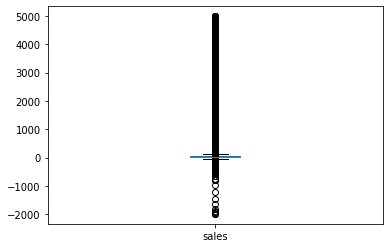

In [56]:
features['sales'].plot(kind='box')

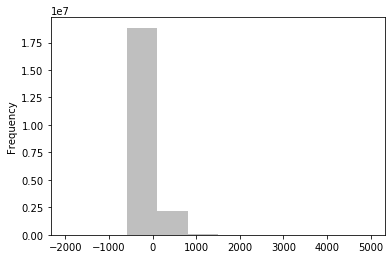

In [57]:
features['sales'].plot(kind='hist', color='gray',alpha=0.5)

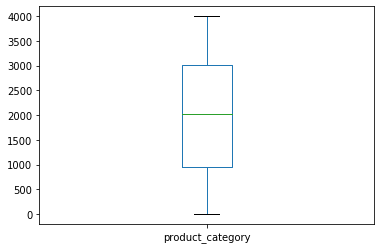

In [58]:
features['product_category'].plot(kind='box')

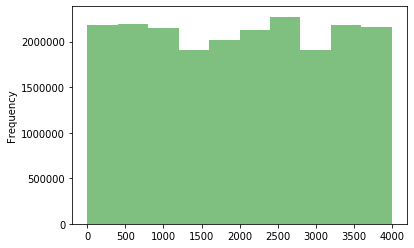

In [59]:
features['product_category'].plot(kind='hist',color='green',alpha=0.5)

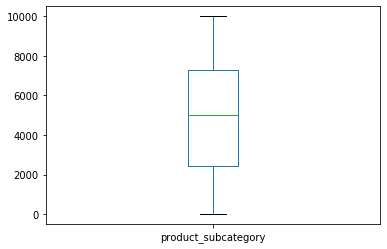

In [60]:
features['product_subcategory'].plot(kind='box')

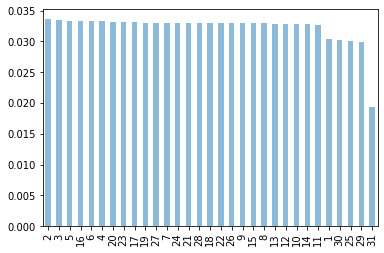

In [63]:
features['day'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

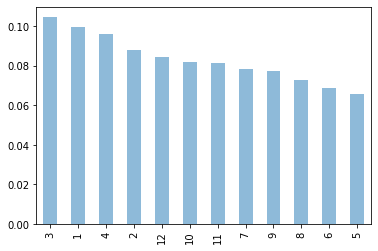

In [64]:
features['month'].value_counts(normalize=True).plot(kind='bar',alpha=0.5)

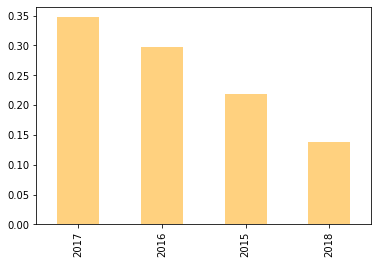

In [73]:
features['year'].value_counts(normalize=True).plot(kind='bar',alpha=0.5, color='orange')

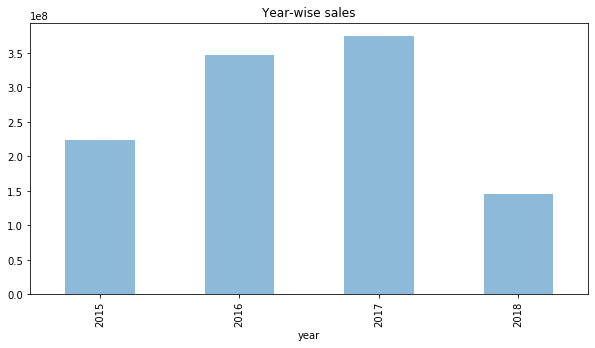

In [71]:
m = features.groupby([features.year])['sales'].sum()
m.plot(kind='bar',figsize = (10,5), title = 'Year-wise sales', alpha=0.5)

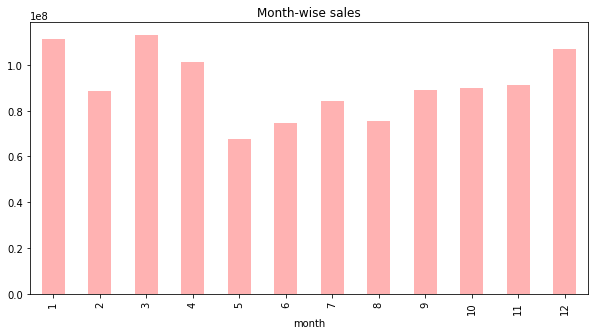

In [70]:
m = features.groupby([features.month])['sales'].sum()
m.plot(kind='bar',figsize = (10,5), title = 'Month-wise sales', color='red', alpha=0.3)

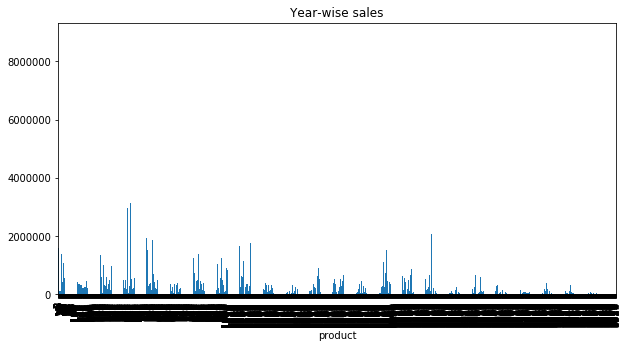

In [68]:
m = features.groupby([features['product']])['sales'].sum()
m.plot(kind='bar',figsize = (10,5), title = 'Product-wise sales')

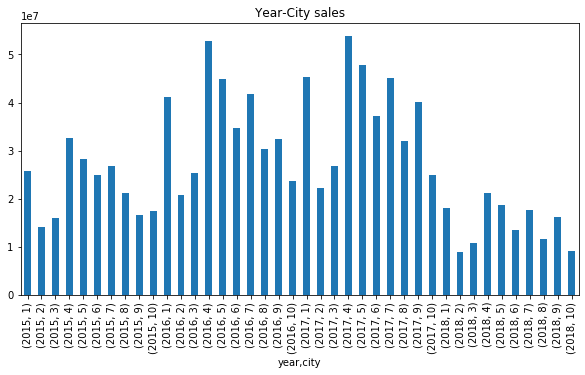

In [76]:
m = features.groupby(['year','city'])['sales'].sum()
m.plot(kind='bar',figsize = (10,5), title = 'Year-City sales')

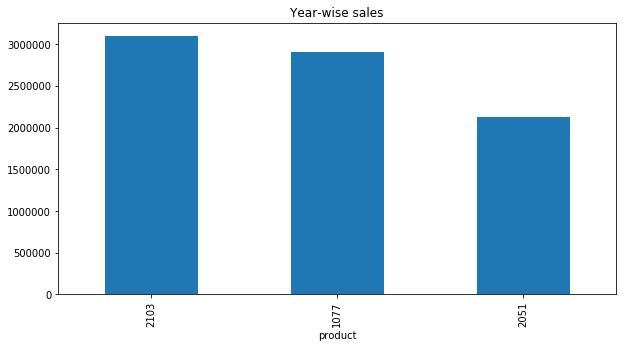

In [78]:
m = features[features.year==2017].groupby(['product'])['sales'].sum().sort_values(ascending=False)[:3]
m.plot(kind='bar',figsize = (10,5), title = 'Year-wise sales')